# Part A

In [1]:
#1A. Read the ‘Signals.csv’ as DataFrame and import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Signaldt = pd.read_csv('NN Project Data - Signal.csv')

In [2]:
#1B. Check for missing values and print percentage for each attribute

missing_values_percentage = Signaldt.isnull().mean() * 100
print(missing_values_percentage)

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64


In [3]:
#1C. Check for presence of duplicate records in the dataset and impute with appropriate method

duplicates = Signaldt.duplicated().sum()
print("Number of duplicate records:", duplicates)

Signaldt.drop_duplicates()

Number of duplicate records: 240


,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


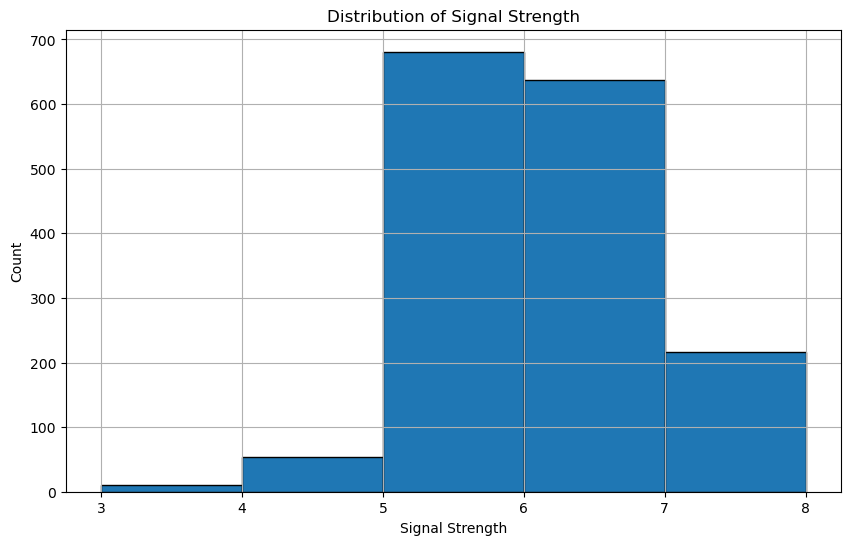

In [4]:
#1D. Visualise distribution of the target variable

plt.figure(figsize=(10, 6))
plt.hist(Signaldt['Signal_Strength'], bins=range(min(Signaldt['Signal_Strength']), max(Signaldt['Signal_Strength']) + 1, 1), edgecolor='black')
plt.title('Distribution of Signal Strength')
plt.xlabel('Signal Strength')
plt.ylabel('Count')
plt.grid(True)
plt.show()


In [5]:
#2A. Split the data into X & Y

X = Signaldt.drop('Signal_Strength', axis=1)
Y = Signaldt['Signal_Strength']

In [6]:
#2B. Split the data into train & test with 70:30 proportion

from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [7]:
#2C. Print shape of all the 4 variables and verify if train and test data is in sync

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (1119, 11)
X_test shape: (480, 11)
Y_train shape: (1119,)
Y_test shape: (480,)


In [8]:
#2D. Normalise the train and test data with appropriate method

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
#2E. Transform Labels into format acceptable by Neural Network

import pandas as pd

Y_train_categorical = pd.get_dummies(Y_train).values
Y_test_categorical = pd.get_dummies(Y_test).values


In [10]:
#3A. Design a Neural Network to Train a Classifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

n_features = X_train_scaled.shape[1]

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))  # First hidden layer
model.add(Dense(8, activation='relu'))  # Second hidden layer
model.add(Dense(Y_train_categorical.shape[1], activation='softmax'))  # Output layer


In [12]:
#3B. Train the Classifier Using Previously Designed Architecture

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, Y_train_categorical, validation_split=0.2, epochs=100, batch_size=10)

Epoch 1/100
90/90 [==============================] - 1s 5ms/step - loss: 1.7335 - accuracy: 0.2905 - val_loss: 1.5692 - val_accuracy: 0.5134
Epoch 2/100
90/90 [==============================] - 0s 3ms/step - loss: 1.5229 - accuracy: 0.4939 - val_loss: 1.3660 - val_accuracy: 0.5670
Epoch 3/100
90/90 [==============================] - 0s 3ms/step - loss: 1.3367 - accuracy: 0.5542 - val_loss: 1.1943 - val_accuracy: 0.5759
Epoch 4/100
90/90 [==============================] - 0s 3ms/step - loss: 1.1987 - accuracy: 0.5698 - val_loss: 1.0746 - val_accuracy: 0.6250
Epoch 5/100
90/90 [==============================] - 0s 3ms/step - loss: 1.1124 - accuracy: 0.5788 - val_loss: 1.0016 - val_accuracy: 0.6161
Epoch 6/100
90/90 [==============================] - 0s 3ms/step - loss: 1.0677 - accuracy: 0.6089 - val_loss: 0.9622 - val_accuracy: 0.6205
Epoch 7/100
90/90 [==============================] - 0s 3ms/step - loss: 1.0434 - accuracy: 0.6034 - val_loss: 0.9370 - val_accuracy: 0.6339
Epoch 8/100
9

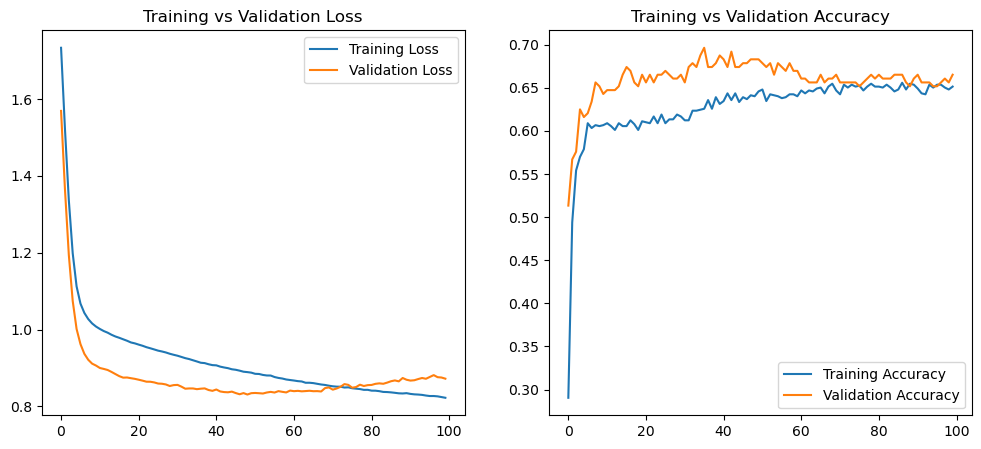

In [13]:
#3.C Plot 2 separate visuals

import matplotlib.pyplot as plt

#i. Plotting Training Loss and Validation Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()

#ii. Plotting Training Accuracy and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.show()


In [14]:
#3.D Design New Architecture/Update Existing Architecture

from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

model_updated = Sequential()
model_updated.add(Dense(16, activation='relu', input_shape=(n_features,)))
model_updated.add(Dropout(0.2))
model_updated.add(Dense(12, activation='relu'))
model_updated.add(Dropout(0.2))
model_updated.add(Dense(Y_train_categorical.shape[1], activation='softmax'))

optimizer = Adam(learning_rate=0.001)
model_updated.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


Epoch 1/100
90/90 [==============================] - 1s 5ms/step - loss: 1.8220 - accuracy: 0.2547 - val_loss: 1.5313 - val_accuracy: 0.4643
Epoch 2/100
90/90 [==============================] - 0s 3ms/step - loss: 1.5334 - accuracy: 0.3877 - val_loss: 1.3464 - val_accuracy: 0.5893
Epoch 3/100
90/90 [==============================] - 0s 3ms/step - loss: 1.3584 - accuracy: 0.4838 - val_loss: 1.2192 - val_accuracy: 0.5982
Epoch 4/100
90/90 [==============================] - 0s 3ms/step - loss: 1.2914 - accuracy: 0.4994 - val_loss: 1.1443 - val_accuracy: 0.5759
Epoch 5/100
90/90 [==============================] - 0s 3ms/step - loss: 1.2075 - accuracy: 0.5117 - val_loss: 1.0818 - val_accuracy: 0.6071
Epoch 6/100
90/90 [==============================] - 0s 3ms/step - loss: 1.1677 - accuracy: 0.5352 - val_loss: 1.0463 - val_accuracy: 0.5893
Epoch 7/100
90/90 [==============================] - 0s 3ms/step - loss: 1.1788 - accuracy: 0.5229 - val_loss: 1.0168 - val_accuracy: 0.6205
Epoch 8/100
9

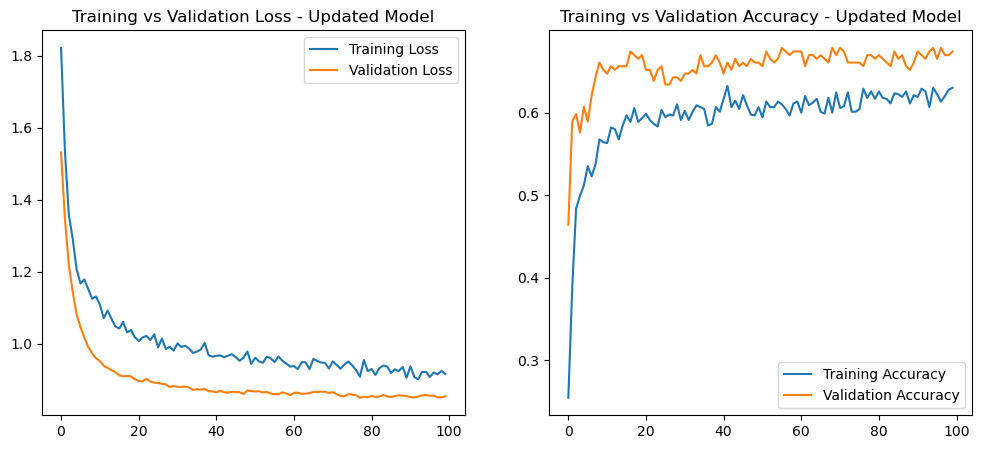

In [15]:
#3.E Plot Visuals for the Updated Model and Share Insights

history_updated = model_updated.fit(X_train_scaled, Y_train_categorical, validation_split=0.2, epochs=100, batch_size=10)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_updated.history['loss'], label='Training Loss')
plt.plot(history_updated.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss - Updated Model')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_updated.history['accuracy'], label='Training Accuracy')
plt.plot(history_updated.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy - Updated Model')
plt.legend()

plt.show()


# Part B

In [20]:
#1A. Read the .h5 file and assign to a variable

import h5py

# Load the .h5 file
file_path = ('C:\\Users\\Rigved Hebbalkar\\OneDrive\\Desktop\\AIML\\Neural Networks\\Autonomous_Vehicles_SVHN_single_grey1 (1).h5')

# Reading the file
h5f = h5py.File(file_path, 'r')


In [21]:
#1B. Print all the keys from the .h5 file

keys = list(h5f.keys())
print(keys)

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [23]:
#1C. Split the data into X_train, X_test, Y_train, Y_test

X_train = h5f['X_train'][:]
Y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
Y_test = h5f['y_test'][:]

In [24]:
#2A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (42000, 32, 32)
Y_train shape: (42000,)
X_test shape: (18000, 32, 32)
Y_test shape: (18000,)


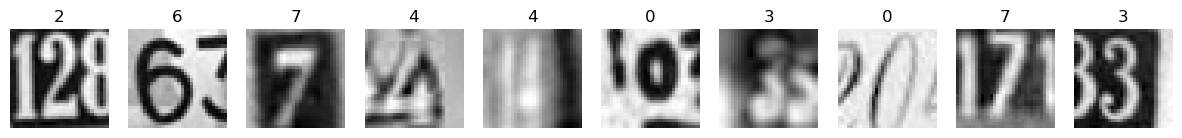

In [26]:
#2B. Visualize first 10 images in train data and print corresponding labels

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 10, figsize=(15, 1.5))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i].reshape(32, 32), cmap='gray')
    ax.axis('off')
    ax.set_title(Y_train[i])

plt.show()

In [27]:
#2C. Reshape all the images with appropriate shape update the data in same variable

X_train_reshaped = X_train.reshape(X_train.shape[0], 32, 32, 1)  # Example shape
X_test_reshaped = X_test.reshape(X_test.shape[0], 32, 32, 1)

In [28]:
#2D. Normalise the images i.e. Normalise the pixel values

X_train_normalized = X_train_reshaped / 255.0
X_test_normalized = X_test_reshaped / 255.0


In [29]:
#2E. Transform Labels into format acceptable by Neural Network

from tensorflow.keras.utils import to_categorical

Y_train_categorical = to_categorical(Y_train)
Y_test_categorical = to_categorical(Y_test)


In [30]:
#2F. Print total Number of classes in the Dataset

num_classes = Y_train_categorical.shape[1]
print("Total number of classes:", num_classes)

Total number of classes: 10


In [31]:
#3A. Design a Neural Network to train a classifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=(32, 32, 1)))  # Adjust input_shape based on your data reshaping
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [32]:
#3B. Train the classifier using previously designed Architecture (Use best suitable parameters)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_normalized, Y_train_categorical, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
1050/1050 [==============================] - 4s 4ms/step - loss: 2.2836 - accuracy: 0.1152 - val_loss: 2.2521 - val_accuracy: 0.1223
Epoch 2/10
1050/1050 [==============================] - 4s 4ms/step - loss: 2.2416 - accuracy: 0.1268 - val_loss: 2.2360 - val_accuracy: 0.1281
Epoch 3/10
1050/1050 [==============================] - 4s 4ms/step - loss: 2.2056 - accuracy: 0.1504 - val_loss: 2.1561 - val_accuracy: 0.1788
Epoch 4/10
1050/1050 [==============================] - 4s 4ms/step - loss: 2.1485 - accuracy: 0.1750 - val_loss: 2.1286 - val_accuracy: 0.1807
Epoch 5/10
1050/1050 [==============================] - 4s 4ms/step - loss: 2.1324 - accuracy: 0.1776 - val_loss: 2.1213 - val_accuracy: 0.1805
Epoch 6/10
1050/1050 [==============================] - 4s 4ms/step - loss: 2.1245 - accuracy: 0.1784 - val_loss: 2.1334 - val_accuracy: 0.1705
Epoch 7/10
1050/1050 [==============================] - 4s 4ms/step - loss: 2.1205 - accuracy: 0.1800 - val_loss: 2.1174 - val_accuracy:

In [33]:
#3.C Evaluate performance of the model with appropriate metrics

loss, accuracy = model.evaluate(X_test_normalized, Y_test_categorical)
print("Test accuracy:", accuracy)

563/563 [==============================] - 1s 3ms/step - loss: 2.1170 - accuracy: 0.1782
Test accuracy: 0.17816667258739471


Text(0, 0.5, 'Accuracy')

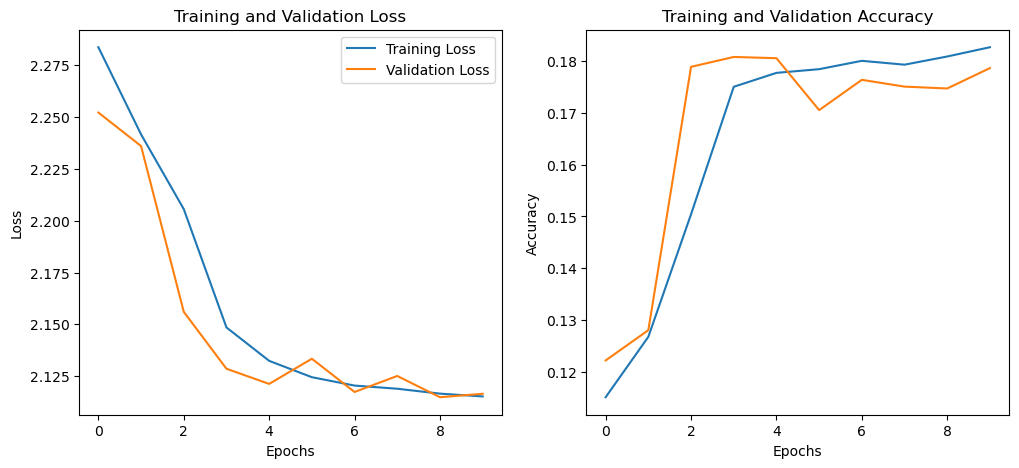

In [36]:
#3.D Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same

# Plotting Training and Validation Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
